In [13]:
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE




if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')




In [14]:
df_1 = pd.read_csv("./Woo_data_3.csv", encoding='euc-kr')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       3318 non-null   object 
 1   달러원종가    3318 non-null   float64
 2   달러원시가    3318 non-null   float64
 3   위안화원_시   3318 non-null   float64
 4   유로달러_시   3318 non-null   float64
 5   코스피시가    3318 non-null   float64
 6   유로인덱스_시  3318 non-null   float64
 7   달러엔_시    3318 non-null   float64
 8   달러위안화_시  3318 non-null   float64
 9   CD91     3318 non-null   float64
 10  WTI      3318 non-null   float64
 11  달러인덱스    3318 non-null   float64
 12  콜금리      3318 non-null   float64
 13  BIR      3318 non-null   float64
 14  엔원_시     3318 non-null   float64
dtypes: float64(14), object(1)
memory usage: 389.0+ KB


In [15]:
df = df_1.copy()
df.drop(['날짜'],axis=1,inplace=True)
X = df.drop('달러원종가',axis=1)
y= df[['달러원종가']]

In [16]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import statsmodels.api as sm

feature_add = sm.add_constant(X, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  달러원종가   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.806e+04
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:52:00   Log-Likelihood:                -10762.
No. Observations:                3318   AIC:                         2.155e+04
Df Residuals:                    3305   BIC:                         2.163e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9622     17.038     -0.526      0.599     -42.369      24.444
달러원시가          0.9838      0.013     78.648      0.000       0.959       1.008
위안화원_시        -0.1057      0.060     -1.754      0.080      -0.224       0.012
유로달러_시         7.4949      3.608      2.077      0.038       0.421      14.569
코스피시가         -0.0014      0.001     -2.042      0.041      -0.003   -5.56e-05
유로인덱스_시        0.1106      0.045      2.446      0.015       0.022       0.199
달러엔_시          0.1106      0.045      2.446      0.015       0.022       0.199
달러위안화_시       -4.1054      1.735     -2.367      0.018      -7.506      -0.704
CD91          -0.5471      0.943     -0.580      0.562      -2.396       1.302
WTI            0.0120      0.012      0.969      0.332      -0.012       0.036
달러인덱스          0.1808      0.052      3.477      0.001       0.079       0.283
콜금리            0.5049      0.856      0.590      0.555      -1.173       2.183
BIR            0.2120      0.759      0.279      0.780      -1.276       1.700
엔원_시           2.1068      0.781      2.698      0.007       0.576       3.638
==============================================================================
Omnibus:                      202.786   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.101
Skew:                           0.036   Prob(JB):                    8.59e-194
Kurtosis:                       5.535   Cond. No.                     1.82e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.33e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       3318 non-null   object 
 1   달러원종가    3318 non-null   float64
 2   달러원시가    3318 non-null   float64
 3   위안화원_시   3318 non-null   float64
 4   유로달러_시   3318 non-null   float64
 5   코스피시가    3318 non-null   float64
 6   유로인덱스_시  3318 non-null   float64
 7   달러엔_시    3318 non-null   float64
 8   달러위안화_시  3318 non-null   float64
 9   CD91     3318 non-null   float64
 10  WTI      3318 non-null   float64
 11  달러인덱스    3318 non-null   float64
 12  콜금리      3318 non-null   float64
 13  BIR      3318 non-null   float64
 14  엔원_시     3318 non-null   float64
dtypes: float64(14), object(1)
memory usage: 389.0+ KB


In [18]:
df_1.isnull().sum()

날짜         0
달러원종가      0
달러원시가      0
위안화원_시     0
유로달러_시     0
코스피시가      0
유로인덱스_시    0
달러엔_시      0
달러위안화_시    0
CD91       0
WTI        0
달러인덱스      0
콜금리        0
BIR        0
엔원_시       0
dtype: int64

In [19]:
df_1.columns

Index(['날짜', '달러원종가', '달러원시가', '위안화원_시', '유로달러_시', '코스피시가', '유로인덱스_시', '달러엔_시',
       '달러위안화_시', 'CD91', 'WTI', '달러인덱스', '콜금리', 'BIR', '엔원_시'],
      dtype='object')

In [20]:
df = df_1.copy()
df.drop(['날짜','CD91','달러원시가'],axis=1,inplace=True)
X = df.drop('달러원종가',axis=1)
y= df[['달러원종가']]

<Axes: >

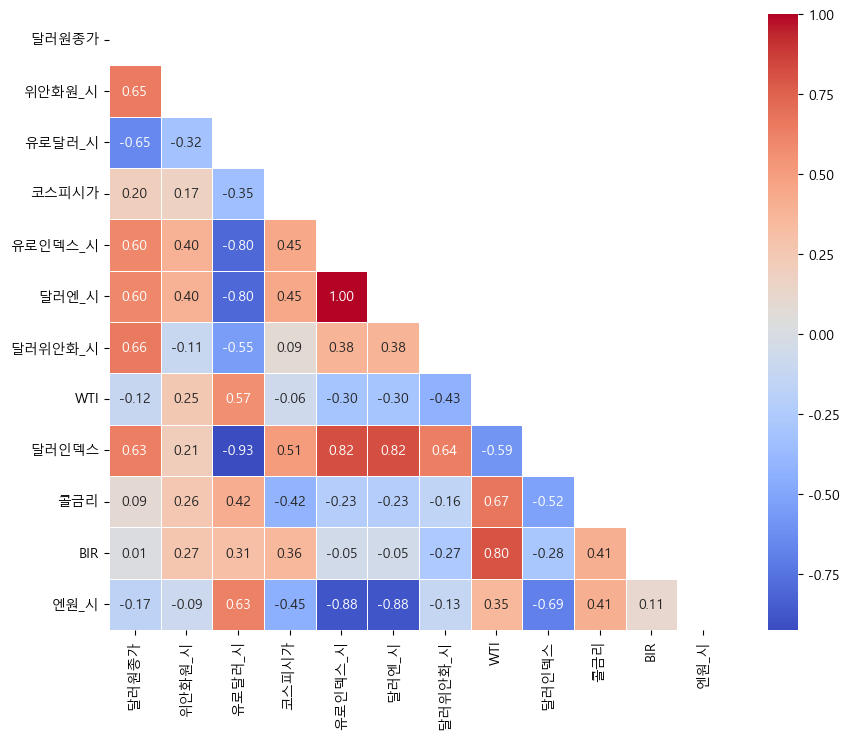

In [21]:
# 변수에 따라서 다중공정성없애기 
# 다중공정성으로 유로달러, 유로인덱스 제외 
corr_data = df[[ '달러원종가',  '위안화원_시', '유로달러_시', '코스피시가', '유로인덱스_시', '달러엔_시',
       '달러위안화_시',  'WTI', '달러인덱스', '콜금리', 'BIR', '엔원_시']].corr()
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_data, dtype=bool))

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)



In [22]:
X.drop(['유로달러_시','유로인덱스_시'],axis=1,inplace=True)

<Axes: >

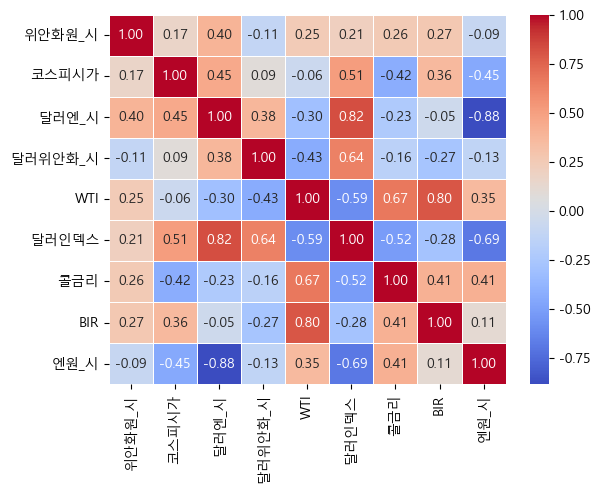

In [23]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')

In [24]:
X.drop(['달러엔_시','달러인덱스'],axis=1,inplace=True)

In [25]:
# 종속변수 인과관계 확인하기 
correlation = np.abs(X.corrwith(df['달러원종가'])).sort_values(ascending=False)
correlation

달러위안화_시    0.659768
위안화원_시     0.649565
코스피시가      0.196765
엔원_시       0.170108
WTI        0.120356
콜금리        0.093694
BIR        0.014383
dtype: float64

In [26]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print(vif)

   Feature   VIF Factor
0    const  1293.379409
1   위안화원_시     1.221718
2    코스피시가     2.766912
3  달러위안화_시     1.360684
4      WTI     6.485569
5      콜금리     2.919973
6      BIR     5.376883
7     엔원_시     1.470934


In [27]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd


feature_add = sm.add_constant(df_1, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
X.drop(['WTI'] ,axis=1,inplace=True)

<Axes: >

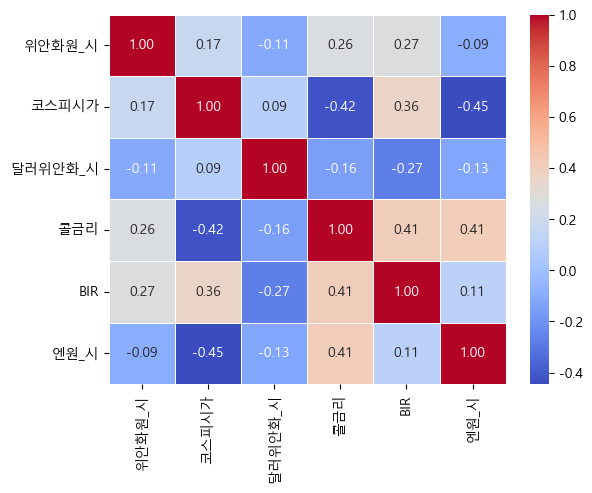

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')

## Train Test split 

In [ ]:
from sklearn.model_selection import cross_val_score, KFold


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, shuffle=False)

pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('lr', LinearRegression())
	])
scores = cross_val_score(pipeline,X_train , y_train ,scoring='neg_mean_squared_error' ,  cv=5 )

scores.mean()

-41.7365840788593

In [ ]:

# 다양한 테스트 세트 크기를 시도하기 위한 비율 리스트
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8]

# 교차 검증 설정
n_splits = 5  # 폴드(Fold)의 수 
random_state = 42  # 시드(seed) 값 (재현성을 위해 사용)

# 모델 및 스케일러 초기화 
regressor = LinearRegression()
scaler = MinMaxScaler()
pipeline = Pipeline([
    ('scaler', scaler),
    ('regressor', regressor)
])

# 다양한 테스트 세트 크기에 대한 결과 저장
results = {}

for test_size in test_sizes:
    # 테스트 세트 크기 설정
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=True)

    # 교차 검증 수행 및 성능 평가 
    scores = cross_val_score(pipeline, X_train, y_train, cv=KFold(n_splits=n_splits, shuffle=True, random_state=random_state), scoring='neg_mean_squared_error')
    
    # 평균 제곱 오차의 평균값 저장
    mean_mse = -scores.mean()
    
    # 결과 저장
    results[test_size] = mean_mse

# 결과 출력
for test_size, mse in results.items():
    print(f"Test Size: {test_size}, Mean Squared Error: {mse:.2f}")

Test Size: 0.1, Mean Squared Error: 203.22
Test Size: 0.2, Mean Squared Error: 43.86
Test Size: 0.3, Mean Squared Error: 43.67
Test Size: 0.4, Mean Squared Error: 43.67
Test Size: 0.5, Mean Squared Error: 43.10
Test Size: 0.6, Mean Squared Error: 42.78
Test Size: 0.7, Mean Squared Error: 42.57
Test Size: 0.8, Mean Squared Error: 45.90


In [ ]:
#  교차검증 + GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8]

# 교차 검증 설정
n_splits_1 = 5  # 폴드(Fold)의 수 (사용자에게 맞게 변경 가능)
random_state_1 = 42  # 시드(seed) 값 (재현성을 위해 사용)

# 모델 및 스케일러 초기화 (사용자가 원하는 모델 및 스케일러로 변경 가능)
GB = GradientBoostingRegressor()
scaler = MinMaxScaler()
pipeline = Pipeline([
    ('scaler', scaler),
    ('GB', GB)
])

# 다양한 테스트 세트 크기에 대한 결과 저장
results = {}

for test_size in test_sizes:
    # 테스트 세트 크기 설정

 

    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # 교차 검증 수행 및 성능 평가 (이 예제에서는 평균 제곱 오차를 사용)
    scores_1 = cross_val_score(pipeline, X_train, y_train, 
                            cv=KFold(n_splits=n_splits_1, shuffle=True,
                             random_state=random_state_1), 
                             scoring='neg_mean_squared_error')
    
    # 평균 제곱 오차의 평균값 저장
    mean_mse = -scores_1.mean()
    
    # 결과 저장
    results[test_size] = mean_mse

# 결과 출력
for test_size, mse in results.items():
    print(f"Test Size: {test_size}, Mean Squared Error: {mse:.4f}")

Test Size: 0.1, Mean Squared Error: 84.0646
Test Size: 0.2, Mean Squared Error: 60.2310
Test Size: 0.3, Mean Squared Error: 59.7783
Test Size: 0.4, Mean Squared Error: 64.0440
Test Size: 0.5, Mean Squared Error: 65.5377
Test Size: 0.6, Mean Squared Error: 67.0392
Test Size: 0.7, Mean Squared Error: 68.1887
Test Size: 0.8, Mean Squared Error: 90.4869


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"전체 데이터 수 = {X.shape[0]}")
print(f'train set 데이터 수 = {X_train.shape[0]}')
print(f'test set 데이터 수 = {X_test.shape[0]}')

전체 데이터 수 = 3318
train set 데이터 수 = 2654
test set 데이터 수 = 664


## 스켈링 (Min & Std + LR 비교)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

StdardScaler = MinMaxScaler()
X_train_std = StdardScaler.fit_transform(X_train)
X_test_std = StdardScaler.transform(X_test)

In [ ]:
# 스켈링된 데이터 분포 그래프로 보기 

## Feature Selection RFE, Filter, Embeded

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# scikit-learn과 statsmodels 서로 호환되지 않을 수 있습니다.  
model = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False,random_state=42)

S_RFE = RFE(model, n_features_to_select=5)
X_train_RFE = S_RFE.fit_transform(X_train,y_train)
X_test_RFE = S_RFE.transform(X_test)
X_train_RFE


array([[170.51  ,   1.4325,   6.8297,   2.38  ,  12.4994],
       [168.56  ,   1.4409,   6.8283,   2.34  ,  12.4257],
       [167.02  ,   1.4364,   6.8277,   2.37  ,  12.4218],
       ...,
       [167.85  ,   1.2217,   6.5371,   1.96  ,  10.5716],
       [167.21  ,   1.2248,   6.5307,   1.96  ,  10.5428],
       [166.35  ,   1.2231,   6.5167,   2.01  ,  10.5232]])

In [ ]:
S_RFE.feature_names_in_
S_RFE.ranking_
S_RFE.feature_names_in_[S_RFE.ranking_ ==1]   

array(['위안화원_시', '유로달러_시', '달러위안화_시', 'BIR', '엔원_시'], dtype=object)

In [ ]:
## Filter 
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=5)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

selector.feature_names_in_

selector.get_support()


selected_mask =selector.get_support()
selected_names = X.columns[selected_mask]
unselected_names = X.columns[~selected_mask]

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['유로달러_시', '달러위안화_시', 'WTI', '달러인덱스', 'BIR'], dtype='object')
Unselected names:  Index(['위안화원_시', '코스피시가', '유로인덱스_시', '달러엔_시', '콜금리', '엔원_시'], dtype='object')


In [ ]:
## Embedded
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=RandomForestRegressor(), threshold=0.1).fit(X_train, y_train)
rf = selector.get_support()
count = np.count_nonzero(rf)
count

selector.get_support()

selected_mask2=selector.get_support()

selected_names = X.columns[selected_mask2]
unselected_names = X.columns[~selected_mask2]

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['위안화원_시', '달러위안화_시', 'BIR'], dtype='object')
Unselected names:  Index(['유로달러_시', '코스피시가', '유로인덱스_시', '달러엔_시', 'WTI', '달러인덱스', '콜금리', '엔원_시'], dtype='object')


## 선형회귀 

In [ ]:
# 스케일링 + 선형회귀 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = df_1.copy()



In [ ]:

X_1=df[['위안화원_시', '코스피시가', '달러위안화_시', '콜금리', '엔원_시','BIR']]
y_1=df['달러원종가']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

pipeline_1 = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaler
    ('regressor', LinearRegression())  # Linear regression model
])

pipeline_1.fit(X_train_1,y_train_1)
y_pred_1=pipeline_1.predict(X_test_1)

coefficients = pipeline_1['regressor'].coef_

intercept = pipeline_1['regressor'].intercept_
mse= mean_squared_error(y_test_1,y_pred_1)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test_1,y_pred_1):.3f}")
print("Coefficients (Weights):", coefficients)
print("Intercept (Bias):", intercept)

MSE : 735.000, RMSE:27.111
Variance score:0.870
Coefficients (Weights): [264.42355689   5.23478352 227.64909305   7.27448268  -3.7613111
  -1.64595513]
Intercept (Bias): 961.6687092805787


In [ ]:
# coef=pd.Series(data=np.round(coefficients,2), index=X.columns)
# coef
# 왜 부호가 맞지 않을까? 
selected_features = X_1.columns
coef = pd.Series(data=np.round(pipeline_1['regressor'].coef_, 2), index=selected_features)
coef

위안화원_시     264.42
코스피시가        5.23
달러위안화_시    227.65
콜금리          7.27
엔원_시        -3.76
BIR         -1.65
dtype: float64

In [ ]:
result = pd.DataFrame(data={'Y':y_test_1, 'Y_pred(LR)':y_pred_1,'diff(LR)':np.round(np.abs(y_test_1-y_pred_1),2)})
result.sort_values(by=['diff(LR)'], ascending=False)

,Y,Y_pred(LR),diff(LR)
3074,1421.34,747.102731,674.24
102,1235.61,1198.101608,37.51
218,1164.50,1127.369829,37.13
93,1194.25,1163.142818,31.11
410,1107.15,1076.147137,31.00
...,...,...,...
2813,1163.87,1163.916048,0.05
2002,1078.56,1078.517854,0.04
2913,1195.59,1195.620798,0.03
2308,1212.87,1212.850395,0.02


In [ ]:
df_2 = df.copy() 
X = df_2[['위안화원_시', '코스피시가', '달러위안화_시', '콜금리', '엔원_시']]  ## 그렇게 해야지 ()이 부분 없어도 오류 안남
y=df_2['달러원종가']                                                                             ## y가 데이터프레임 전체로 저장되서 shape오류가 났었음
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 의사결정나무 기반 회귀 알고리즘 

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100
    print('MSE: {0:.3f}, RMSE: {1:.3f}, R-squared: {2:.3f}, MAE: {3:.3f}, MAPE: {4:.3f}%'.format(mse, rmse, r2, mae, mape))


In [ ]:

model_list = [forest_model, lgb_model, xgb_model]
    

for model in model_list:
    model.fit(X_train, y_train)  # 모델 학습
    y_preds = model.predict(X_test)
    print('{0}모델'.format(model.__class__.__name__))
    printRegressorResult(y_test, y_preds)

RandomForestRegressor모델
MSE: 155.616, RMSE: 12.475, R-squared: 0.972, MAE: 5.591, MAPE: 0.472%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 2654, number of used features: 5
[LightGBM] [Info] Start training from score 1149.586879
LGBMRegressor모델
MSE: 162.852, RMSE: 12.761, R-squared: 0.971, MAE: 5.935, MAPE: 0.501%
XGBRegressor모델
MSE: 185.425, RMSE: 13.617, R-squared: 0.967, MAE: 6.155, MAPE: 0.519%


In [ ]:
from sklearn.linear_model import SGDRegressor

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaler
    ('sgd', SGDRegressor(shuffle=False))  # SGDRegressor model
])

pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)


mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100
print('MSE: {0:3f}, RMSE: {1:3f}, R-squared: {2:3f}, MAE: {3:3f}, MAPE: {4:3f}%'.format(mse, rmse, r2, mae, mape))


MSE: 730.236495, RMSE: 27.022888, R-squared: 0.870851, MAE: 6.057468, MAPE: 0.502262%


In [ ]:

result = pd.DataFrame(data={'Y':y_test, 'Y_pred(SGD)':y_pred,'diff(SGD)':np.round(np.abs(y_test-y_pred),2)})
result.sort_values(by=['diff(SGD)'], ascending=False)

,Y,Y_pred(SGD),diff(SGD)
3074,1421.34,749.610912,671.73
102,1235.61,1197.866957,37.74
218,1164.50,1127.590290,36.91
93,1194.25,1163.037234,31.21
410,1107.15,1076.336909,30.81
...,...,...,...
1080,1014.12,1014.036548,0.08
1652,1167.63,1167.573382,0.06
805,1102.53,1102.477891,0.05
288,1125.00,1125.036548,0.04


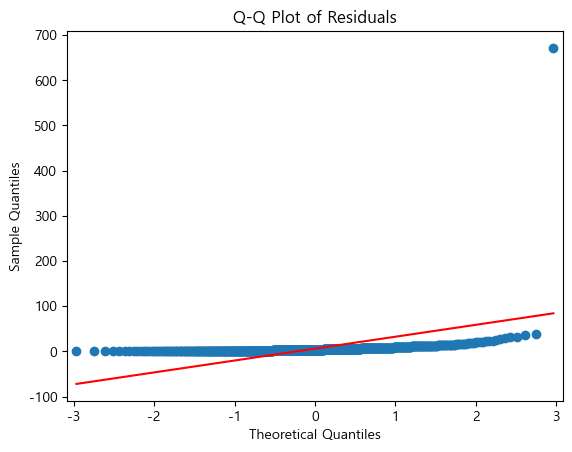

Normality test statistic: 1667.8139024508062
p-value: 0.0


In [ ]:
from scipy.stats import normaltest
import statsmodels.api as sm
# Residuals
residuals = result['diff(SGD)']

# Residual analysis


# Q-Q Plot
sm.qqplot(residuals.values.flatten(), line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 잔차의 정규성 검정
statistic, p_value = normaltest(residuals.values.flatten())

print("Normality test statistic:", statistic)
print("p-value:", p_value)

In [ ]:
# from scipy.stats import jarque_bera
import numpy as np
from scipy.stats import jarque_bera


# Jarque-Bera 정규성 검정 수행
jb_value, p_value = jarque_bera(residuals)

# 검정 통계량과 p-value 출력 
print("Jarque-Bera 검정 통계량: {:.2f}".format(jb_value))
print("p-value: {:.8f}".format(p_value))

Jarque-Bera 검정 통계량: 10421224.51
p-value: 0.00000000


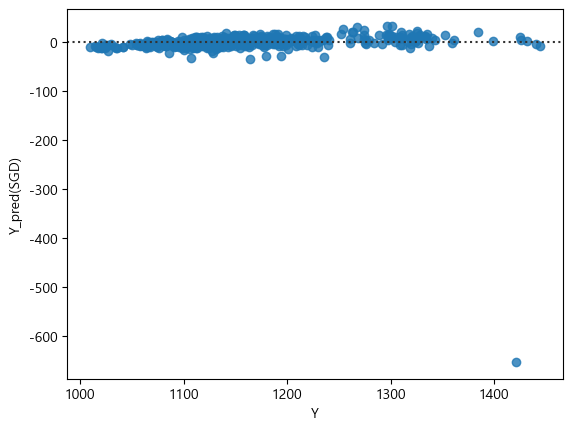

In [ ]:
import seaborn as sns

sns.residplot(x=result['Y'],y= result['Y_pred(SGD)'])
plt.show()

In [ ]:
np.mean(residuals)

6.057424698795181

### Grid Search CV 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE



sclaer = MinMaxScaler()
lgb=LGBMRegressor()
feature = RFE(LinearRegression(), n_features_to_select=5)

pipe = Pipeline([
    ('scaler',sclaer),
    ('feature_select',feature),
    ('model', lgb)
])

param = {
    'model__max_depth': [2,3,5],
    'model__learning_rate' : [0.1,0.01]
}

grid = GridSearchCV(estimator=pipe, param_grid=param, cv=3)
grid.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 1769, number of used features: 5
[LightGBM] [Info] Start training from score 1151.012390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_select',
                                        RFE(estimator=LinearRegression(),
                                            n_features_to_select=5)),
                                       ('model', LGBMRegressor())]),
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [2, 3, 5]})

In [ ]:
grid.best_params_

{'model__learning_rate': 0.1, 'model__max_depth': 5}

In [ ]:
y_pred=grid.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_pred,y_test)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'r2_score:{score:.2f}')

Mean Squared Error: 168.03
Root Mean Squared Error: 12.96
r2_score:0.97


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

sclaer = MinMaxScaler()
RF = RandomForestRegressor()
feature = RFE(LinearRegression(), n_features_to_select=5)

pipe = Pipeline([
    ('scaler', sclaer),
    ('feature_select', feature),
    ('model', RF)  # Changed 'rf' to 'RF'
])

param = {
    'model__max_depth': [2, 3, 5],
    'model__min_samples_leaf': [10, 20, 30],  # Corrected the parameter name
    'model__n_estimators': [100, 200, 300]
}

grid = GridSearchCV(estimator=pipe, param_grid=param, cv=3)
grid.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_select',
                                        RFE(estimator=LinearRegression(),
                                            n_features_to_select=5)),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [2, 3, 5],
                         'model__min_samples_leaf': [10, 20, 30],
                         'model__n_estimators': [100, 200, 300]})

In [ ]:
grid.best_params_

{'model__max_depth': 5,
 'model__min_samples_leaf': 10,
 'model__n_estimators': 100}

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_pred,y_test)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'r2_score:{score:.2f}')

Mean Squared Error: 168.03
Root Mean Squared Error: 12.96
r2_score:0.97


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

sclaer = MinMaxScaler()
XGB = XGBRegressor()
feature = RFE(LinearRegression(), n_features_to_select=5)

pipe = Pipeline([
    ('scaler', sclaer),
    ('feature_select', feature),
    ('model', XGB)  # Changed 'rf' to 'RF'
])

param = {
    'model__max_depth': [2, 3, 5],
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate' : [0.1,0.01]
}

grid = GridSearchCV(estimator=pipe, param_grid=param, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_select',
                                        RFE(estimator=LinearRegression(),
                                            n_features_to_select=5)),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_me...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [2, 3, 5],
                         'model__n_estimators': [100, 200, 300]})

In [ ]:
grid.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 300}

In [ ]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_pred,y_test)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'r2_score:{score:.2f}')

Mean Squared Error: 168.03
Root Mean Squared Error: 12.96
r2_score:0.97
